In [1]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import mrmr
from pymrmr import mRMR
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold, GridSearchCV
import mrmr
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import os.path
import json
from sklearn.metrics import auc, precision_recall_curve, average_precision_score, PrecisionRecallDisplay
import pymrmr
from scipy.stats import kruskal, mannwhitneyu, kendalltau, spearmanr
from boruta import BorutaPy
import umap.umap_ as umap
import icikt
from tqdm import tqdm
from sklearn.feature_selection import mutual_info_classif as MIC
from minepy import MINE
import random

random.seed(10)

# Import data

In [2]:
# import data from csv 
cnv = pd.read_csv('dataset_hg19/dataset/cnv.csv', sep=' ')

cnv.head()

,ACAP3,ACTRT2,AGRN,ANKRD65,ATAD3A,ATAD3B,ATAD3C,AURKAIP1,B3GALT6,C1orf159,...,SMIM9,SNORA36A,SNORA56,TMLHE,VBP1,IL9R|ENSG00000124334.12,SPRY3|ENSG00000168939.6,VAMP7|ENSG00000124333.10,WASH6P|ENSG00000182484.10,WASIR1|ENSG00000185203.7
TCGA-3C-AALI,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
TCGA-3C-AALK,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TCGA-4H-AAAK,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TCGA-5L-AAT1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TCGA-5T-A9QA,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,0,0,0,0,0,0,0,0,0,0


In [3]:
miRNA = pd.read_csv('dataset_hg19/dataset/mirna.csv', sep=' ')

miRNA.head()

,hsa-let-7a-1,hsa-let-7a-2,hsa-let-7a-3,hsa-let-7b,hsa-let-7c,hsa-let-7d,hsa-let-7e,hsa-let-7f-1,hsa-let-7f-2,hsa-let-7g,...,hsa-mir-941-3,hsa-mir-941-4,hsa-mir-942,hsa-mir-943,hsa-mir-944,hsa-mir-95,hsa-mir-96,hsa-mir-98,hsa-mir-99a,hsa-mir-99b
TCGA-3C-AALI,49201,98691,49035,148591,5095,3263,3566,133,41683,2231,...,0,0,52,0,4,8,383,547,1503,80378
TCGA-3C-AALK,57278,114320,57540,164553,18464,2114,8364,113,40723,2245,...,0,0,22,0,22,11,459,263,6620,152218
TCGA-4H-AAAK,67196,134563,67607,136918,20429,2162,10556,139,50848,2056,...,0,0,13,0,7,5,123,212,6666,158568
TCGA-5L-AAT1,94243,188921,94346,211457,21076,2657,12104,272,94610,3903,...,0,0,23,0,12,11,235,529,5352,196557
TCGA-5T-A9QA,49313,97721,49623,127544,2134,1769,8190,104,28306,2792,...,0,0,72,0,3,23,186,146,445,127728


In [4]:
mRNA = pd.read_csv('dataset_hg19/dataset/mrna.csv', sep=' ')

mRNA.head()

,A1BG,A1CF,A2BP1,A2LD1,A2ML1,A2M,A4GALT,A4GNT,AAA1,AAAS,...,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3,psiTPTE22,tAKR
TCGA-3C-AALI,436.55,0,0,130.32,8,13924.87,290,1,0,1633,...,110,825,2470,365,1110,10123,2425,748,1704,0
TCGA-3C-AALK,461.69,0,0,151.08,4,26490.85,1224,0,0,1878,...,133,1058,2088,424,1468,13756,1888,1694,161,0
TCGA-4H-AAAK,631.87,1,9,362.77,8,22525.79,804,1,1,1925,...,115,997,2467,33,1823,9498,1955,2072,440,0
TCGA-5L-AAT1,259.26,0,0,125.12,5,18903.93,323,1,0,971,...,55,697,1213,66,630,5421,1732,698,71,0
TCGA-5T-A9QA,600.72,1,1,446.68,0,6084.91,787,7,0,1670,...,55,547,1548,4,615,6160,2132,843,7,0


In [5]:
proteins = pd.read_csv('dataset_hg19/dataset/proteins.csv', sep=' ')

proteins.head()

,14-3-3_beta,14-3-3_epsilon,14-3-3_zeta,4E-BP1,4E-BP1_pS65,4E-BP1_pT37_T46,4E-BP1_pT70,53BP1,A-Raf,A-Raf_pS299,...,p27_pT157,p27_pT198,p38_MAPK,p38_pT180_Y182,p53,p62-LCK-ligand,p70S6K,p70S6K_pT389,p90RSK,p90RSK_pT359_S363
TCGA-3C-AALI,-0.000752,0.022553,0.021112,0.101796,-0.382850,-0.108997,0.103860,-0.335720,0.139450,0.148123,...,-0.076626,-0.231296,-0.169884,0.040360,-0.043975,1.293687,0.783984,0.162565,-0.667649,-0.102581
TCGA-3C-AALK,-0.202252,0.077041,0.153997,0.299107,-0.438903,-0.460678,-0.358195,0.474016,0.376476,-0.160318,...,-0.219547,-0.340080,0.208381,0.365363,-0.136875,0.680809,0.612644,-0.131174,0.419210,-0.118623
TCGA-4H-AAAK,-0.208434,0.062566,0.034209,0.429696,-0.102852,-0.499466,-0.433138,0.143794,0.339525,-0.221161,...,-0.070647,-0.471717,-0.052702,0.068514,-0.080364,0.300677,0.819253,-0.520017,0.003252,-0.855659
TCGA-5L-AAT1,-0.465476,0.141845,0.232721,0.427772,-0.231596,0.276124,-0.411702,0.736283,0.398665,-0.063979,...,-0.145362,-0.582255,0.346637,0.289421,-0.225658,0.591818,0.623455,-0.559783,0.510494,-0.601296
TCGA-5T-A9QA,-0.354823,0.156575,0.249023,1.197526,0.447913,1.001215,0.307314,0.581762,0.316779,-0.085146,...,0.076588,-0.325001,0.166015,-1.064492,0.181296,-0.226434,0.842169,0.280629,0.524148,-0.500144


In [6]:
len(proteins)

627

# Import label

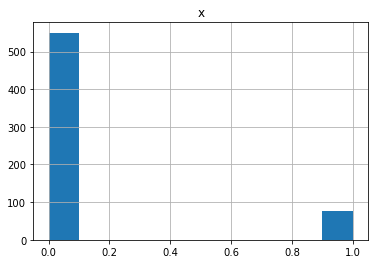

In [7]:
label = pd.read_csv('dataset_hg19/dataset/labels_pfi.csv', sep=' ')

label.hist()
plt.show()

# Check NaN values

In [8]:
def checkNaNValues(dataset):
    if dataset.isna().sum().sum() == 0:
        print(f"Non sono presenti dati NaN")
    else:
        for column in dataset:
            if dataset[column].isna().sum() == 0:
                print(f"Nella colonna {column} non sono presenti dati NaN")
            else:
                print(f"Nella colonna {column} sono presenti: {dataset[column].isna().sum()}")

In [9]:
checkNaNValues(cnv)

Non sono presenti dati NaN


In [10]:
checkNaNValues(mRNA)

Non sono presenti dati NaN


In [11]:
checkNaNValues(miRNA)

Non sono presenti dati NaN


In [12]:
checkNaNValues(proteins)

Non sono presenti dati NaN


# Normalize data

In [13]:
def dataNormalization(scaler, data):
    scl = scaler()
    model = scl.fit(data)
    scaled_data = model.transform(data)
    
    return pd.DataFrame(scaled_data, columns=data.columns, index=data.index)

# Filter feature with low variability

In [14]:
def filter_features_with_low_variability(data, alfa) -> pd.DataFrame:
    for column in data:
        if data[column].std() < alfa:
            #print(f'column: {column} has standard deviation < {alfa}, removed')
            data.drop(column, axis=1, inplace=True)
    return data

# Normalize and filter datasets

In [15]:
dataset_dict = {'cnv': cnv, 'mirna': miRNA, 'mrna': mRNA, 'proteins': proteins}

In [16]:
def create_data_normalized_filtered(data_dict, scaler, min_variance):
    dict_filtered_nornalize = {}
    for (key, value) in zip(data_dict, data_dict.values()):
        if key != 'cnv':
            dict_filtered_nornalize[key] = filter_features_with_low_variability(dataNormalization(MinMaxScaler, value), 0.05)
        else:
            dict_filtered_nornalize[key] = value
    return dict_filtered_nornalize

# Store and retrieve data normalize and filtered

In [17]:
def mkdir_p(path):
    try:
        os.makedirs(path)
    except OSError as exc: # Python >2.5
        if exc.errno == errno.EEXIST and os.path.isdir(path):
            pass
        else: raise

In [18]:
def store_filtered_normalize_data(dataset_dict):
    if not os.path.exists('filtered_normalize_data'):
        mkdir_p('filtered_normalize_data')
        filtered_normalize_data = create_data_normalized_filtered(dataset_dict, MinMaxScaler, 0.05)
        for data in dataset_dict:
            filtered_normalize_data[data].to_json('filtered_normalize_data/'+data+'.json')

In [19]:
def load_filtered_normalize_data(dataset_dict):
    dict_test = {}
    if os.path.exists('filtered_normalize_data'):
        for data in dataset_dict:
            with open('filtered_normalize_data/'+data+'.json', 'r') as fp:
                dataset = pd.read_json(fp)
                dict_test[data] = dataset
        return dict_test
    else:
        store_filtered_normalize_data(dataset_dict)
        load_filtered_normalize_data(dataset_dict)

In [20]:
%time datasets = load_filtered_normalize_data(dataset_dict)

CPU times: user 7.76 s, sys: 667 ms, total: 8.42 s
Wall time: 8.42 s


In [21]:
datasets

{'cnv':               ACAP3  ACTRT2  AGRN  ANKRD65  ATAD3A  ATAD3B  ATAD3C  AURKAIP1  \
 TCGA-3C-AALI     -1      -1    -1       -1      -1      -1      -1        -1   
 TCGA-3C-AALK      0       0     0        0       0       0       0         0   
 TCGA-4H-AAAK      0       0     0        0       0       0       0         0   
 TCGA-5L-AAT1      0       0     0        0       0       0       0         0   
 TCGA-5T-A9QA     -1      -1    -1       -1      -1      -1      -1        -1   
 ...             ...     ...   ...      ...     ...     ...     ...       ...   
 TCGA-W8-A86G      0       0     0        0       0       0       0         0   
 TCGA-WT-AB41     -1      -1    -1       -1      -1      -1      -1        -1   
 TCGA-XX-A899      0       0     0        0       0       0       0         0   
 TCGA-Z7-A8R5     -1      -1    -1       -1      -1      -1      -1        -1   
 TCGA-Z7-A8R6      0       0     0        0       0       0       0         0   
 
               B3GA

In [22]:
#baseline AUPRC
label[label['x'] == 1].count()/len(label)

x    0.122807
dtype: float64

In [23]:
label[label['x'] == 1].count()

x    77
dtype: int64

# Correlation with Spearman on cnv

In [23]:
p_value_threshold = 0.05
correlation_threshold = 0.01

In [24]:
def compute_spearmanr_with_label(dataset, label):
    not_correlated_features = []
    for feature in tqdm(dataset.columns, desc=f"Running Spearman test on cnv", dynamic_ncols=True, leave=False):
        correlation, p_value = spearmanr(dataset[feature].values.flatten(), label.values.flatten())
        if p_value > p_value_threshold:
            #print(f"In cnv the feature {feature} does not correlate in a statistically significant manner with the output. p-value:{p_value} -- correlation:{correlation}")
            not_correlated_features.append(feature)
    return not_correlated_features

In [25]:
def spearmanr_between_feature(
    X:pd.DataFrame,
    feature_left: str,
    feature_right: str,
):
    """Returns Spearman correlation.
    
    Parameters
    ----------------------
    X:pd.DataFrame,
        The epigenomic data.
    feature_left: str,
        The left features to compute pearson for.
    feature_right: str,
        The right features to compute pearson for.
    """
    correlation, p_value = spearmanr(
        X[feature_left].values.flatten(),
        X[feature_right].values.flatten(),
    )
    return dict(
        correlation=correlation,
        p_value=p_value
    )

In [26]:
def compute_spearmanr_between_feature(dataset):
    spearman_result = []
    score = []
    highly_correlated_future = []
    for feature_left in tqdm(dataset.columns, desc=f"Running Spearman test", dynamic_ncols=True, leave=False):
        for feature_right in dataset.columns:
                spearman_result  = spearmanr_between_feature(dataset,feature_left,feature_right)
                
                score.append(spearman_result)
                if feature_left!=feature_right and spearman_result["p_value"] < p_value_threshold and np.abs(spearman_result["correlation"]) > 0.95:
                    correlation = spearman_result["correlation"]
                    #print(f"The feature {feature_left} is highly correlated with {feature_right} ({correlation}).")
                    highly_correlated_future.append(feature_left)
    return highly_correlated_future

## Creation cnv dataset after drop feature not correlated with output and features with higly correlations with other features

In [27]:
def compute_all_spearman(dataset, label):
    #Drop features not correlated with output
    new_df = dataset.drop(compute_spearmanr_with_label(dataset, label), axis=1)
    high_correlated_feature = compute_spearmanr_between_feature(new_df)
    return new_df.drop(high_correlated_feature, axis=1).columns

In [28]:
#compure_all_spearman(datasets['cnv'])

# Correlation with Mine

In [29]:
def compute_mine(dataset, label):
    feature_to_drop = []
    for feature in tqdm(dataset.columns, desc=f"Running MINE test", dynamic_ncols=True, leave=False):
        mine = MINE()
        mine.compute_score(dataset[feature].values.ravel(), label.values.ravel())
        score = mine.mic()
        if score < correlation_threshold:
            feature_to_drop.append(feature)
    return dataset.drop(feature_to_drop, axis=1).columns

In [30]:
#compute_mine(datasets['mRNA'])

# Univariate feature selection using Kruskal-Wallis e Mann-Whitney

In [31]:
def create_dataframe_pos_neg(dataset, label):
    return (dataset[label['x']==1], dataset[label['x']==0])

In [32]:
def univariate_features_selection(dataset, label, univariate_tecnique, min_pValue):
    pos, neg = create_dataframe_pos_neg(dataset, label)
    H, pval = univariate_tecnique(pos, neg)
    mask = (pval < min_pValue)
    return dataset.columns[mask]

# Umap

In [33]:
#init='random'
def execute_umap(n_components, X, y):
    return umap.UMAP(n_neighbors=5, n_components=n_components, random_state=42).fit_transform(X, y)

In [34]:
#execute_umap(200, datasets['proteins'], label)

# Multivariate feature selection, mrmr and Boruta

In [35]:
def execute_mrmr(dataset, n_feature):
    print('entra in mrmr')
    return mRMR(dataset, 'MIQ', n_feature)

In [36]:
def execute_boruta_feature_selection(
    X_train: pd.DataFrame,
    y_train: np.ndarray,
    holdout_number: int,
    max_iter: int = 100,
):
    """Returns tuple with list of kept features and list of discared features.
    
    Parameters
    --------------------------
    X_train: pd.DataFrame,
        The data reserved for the input of the training of the Boruta model.
    y_train: np.ndarray,
        The data reserved for the output of the training of the Boruta model.
    holdout_number: int,
        The current holdout number.
    max_iter: int = 100,
        Number of iterations to run Boruta for.
    """
    
    print('execute boruta')

    model = RandomForestClassifier(n_jobs=-1, class_weight='balanced_subsample', max_depth=5)
    
    boruta_selector = BorutaPy(
        model,
        n_estimators='auto',
        verbose=False,
        alpha=0.05,
        max_iter=max_iter, 
        random_state=42,
    )
    boruta_selector.fit(X_train.values, y_train.values.ravel())
    
    kept_features = list(X_train.columns[boruta_selector.support_])
    discarded_features = list(X_train.columns[~boruta_selector.support_])
    
    return kept_features, discarded_features

In [37]:
#k, d = execute_boruta_feature_selection(datasets['mRNA'], label, 5)

# Train

In [38]:
def train_model(key, label, num_extenal_fold, type_feature_selection, datasets):
    
    """Return AUPRC score after training.
    
    Parameters
    --------------------------
    dataset: string,
        The data reserved for the input of the training.
    label: pd.DataFrame,
        The data reserved for the output of the training.
    num_external_fold: int,
        The current holdout number.
    type_feature_selection: string,
        Type of feature selection: ['kruskal', 'mrmr', 'mannwhitneyu', 'boruta']
    min_pValue: int,
        Minimum value of p_value. Valid if type_feature_selection == 'kruskal' or 'mannwhitneyu',
    use_umap: bool,
        Specified to use or not use UMAP for feature extraction after univariate feature selection (kruskal, mannwhitneyu)
    """
    
    aucs =[]
    dataset = datasets[key]
    y_score_concatenated = []
    y_test_fold_concatenated = []
    
    #to numpy
    X_numpy = dataset.to_numpy()
    y_numpy = label['x'].to_numpy()
    
    external_fold = StratifiedKFold(n_splits=num_extenal_fold, shuffle=True, random_state=1)
    
    for train_index, test_index in tqdm(external_fold.split(X_numpy, label), desc=f"Running fold ", dynamic_ncols=True, leave=False):
        
        X_train_fold, X_test_fold = X_numpy[train_index], X_numpy[test_index]
        y_train_fold, y_test_fold = y_numpy[train_index], y_numpy[test_index]
        
        df_X_train = pd.DataFrame(data=X_train_fold, columns=dataset.columns)
        df_X_test = pd.DataFrame(data=X_test_fold, columns=dataset.columns)
        df_y_train = pd.DataFrame(data=y_train_fold, columns=label.columns)
        
        
        #feature selection
        if 'kruskal' in type_feature_selection:
            selected_features = univariate_features_selection(df_X_train, df_y_train, kruskal, 0.05)
        elif 'mannwhitneyu' in type_feature_selection:
            selected_features = univariate_features_selection(df_X_train, df_y_train, mannwhitneyu, 0.05)
        elif type_feature_selection == "mrmr":
            selected_features = execute_mrmr(df_X_train, 100)
        elif type_feature_selection == 'boruta':
            selected_features, discarded_feature =  execute_boruta_feature_selection(df_X_train, df_y_train, 5)
        elif type_feature_selection == 'mine':
            selected_features = compute_mine(df_X_train, df_y_train)
        elif type_feature_selection == 'spearman':
            selected_features = compute_all_spearman(df_X_train, df_y_train)
        else:
            return "Invalid", "type of feature selection"
              
        X_train_selected_feature = df_X_train[selected_features]
        X_test_selected_feature = df_X_test[selected_features]
        
        
        if 'umap' in type_feature_selection:
            X_train_selected_feature = execute_umap(50, X_train_selected_feature, y_train_fold)
            X_test_selected_feature = execute_umap(50, X_test_selected_feature , y_test_fold)
            
        clf = GridSearchCV(estimator=RandomForestClassifier(),
                           scoring='average_precision',
                           param_grid=model_selection_grid_DT, 
                           cv=2, 
                           n_jobs=-1)
        clf.fit(X_train_selected_feature, y_train_fold)

        #auc = clf.best_estimator_.score(X_test_selected_feature, y_test_fold)
        
        # Create classifier
        #clf = RandomForestClassifier(random_state=1)
        #clf.fit(X_train_selected_feature, y_train_fold)
        
        # Get the predicited probability of testing data
        y_score = clf.predict_proba(X_test_selected_feature)[:, 1]
        
        #calculate precision and recall
        precision, recall, thresholds = precision_recall_curve(y_test_fold, y_score)

        #plot_precision_recall_curve(classifier, X_test_selected_feature, y_test_fold)
        
        y_score_concatenated = np.concatenate((y_score_concatenated, y_score), axis=None)
        y_test_fold_concatenated = np.concatenate((y_test_fold_concatenated, y_test_fold), axis=None)
        
        
        # Use AUC function to calculate the area under the curve of precision recall curve
        auc_precision_recall = auc(recall, precision)
        
        aucs.append(auc_precision_recall)
        #print('auc: {:.3f} using params {}:'.format(auc_precision_recall, clf.best_params_))
    
    internal_auc = np.mean(aucs)
    
    #calculate precision and recall
    precision, recall, thresholds = precision_recall_curve(y_test_fold_concatenated, y_score_concatenated)
    
    external_auc = auc(recall, precision)

    #plot precision recall curve
    PrecisionRecallDisplay.from_predictions(y_test_fold_concatenated, y_score_concatenated)

    plt.title('Random_Forest external')
    #plt.show()
    plt.savefig('result/'+key+'/'+type_feature_selection+'_'+'AUC_External.pdf')
    
    return '{0:.4f}'.format(internal_auc), '{0:.4f}'.format(external_auc), str(clf.best_estimator_)

In [39]:
model_selection_grid_DT = [
    {'criterion': ['gini', 'entropy'],
     'max_leaf_nodes': [None, 2, 5, 10],
     'max_features': [None, 'sqrt', 'log2'],
    'n_estimators': [51, 101, 251, 500]}
]

# Train all datasets with combination of feature selection and feature extraction 

In [40]:
files_nameme = ['result/proteins/proteins.json', 'result/miRNA/mRNA.json', 'result/mRNA/miRNA.json', 'result/cnv/cnv.json']
dataset_list = ['proteins', 'mrna', 'mirna', 'cnv']
feature_selection_list = ['mannwhitneyu', 'mrmr', 'mannwhitneyu_with_umap']

In [41]:
def create_result_json(result_dict, feature_selection_list, files_name, dataset_list, label, datasets,):
    for file_name, key in tqdm(zip(files_name, dataset_list), desc=f"Running training ", dynamic_ncols=True, leave=False):
        #print(f'FILE NAME {file_name}')
        if os.path.exists(file_name):
            with open(file_name, 'r') as fp:
                saved_dict = json.load(fp)
                result_dict[key] = saved_dict
                for feature_selection in tqdm(feature_selection_list,desc=f"Running {key} training ", dynamic_ncols=True, leave=False):
                    print(f'TECNICA DI FS exist {feature_selection}')
                    if not feature_selection in result_dict[key].keys():
                        result_dict[key][feature_selection] = {}    
                        result_dict[key][feature_selection]['internal'],  result_dict[key][feature_selection]['external'], result_dict[key][feature_selection]['best_estimator'] = train_model(key, label, 10, feature_selection, datasets)
                        with open(file_name, 'w', encoding='utf-8') as fp:
                            json.dump(result_dict[key], fp, ensure_ascii=False, indent=4)
        else:
            result_dict[key] = {}
            for feature_selection in tqdm(feature_selection_list, desc=f"Running {key} training ", dynamic_ncols=True, leave=False):
                print(f'TECNICA DI FS check {feature_selection}')
                print(f'file name {file_name}')
                result_dict[key][feature_selection] = {}    
                result_dict[key][feature_selection]['internal'],  result_dict[key][feature_selection]['external'], result_dict[key][feature_selection]['best_estimator'] = train_model(key, label, 10, feature_selection, datasets)
            with open(file_name, 'w', encoding='utf-8') as fp:
                json.dump(result_dict[key], fp, ensure_ascii=False, indent=4)

# Create cnv result using spearman

In [42]:
result_dict = {}

dataset_list = ['cnv']
cnv_file_name = ['result/cnv/cnv.json']
feature_selection_list_cnv = ['spearman']

In [43]:
!mkdir 'result/cnv'
create_result_json(result_dict, feature_selection_list_cnv, cnv_file_name, dataset_list, label, datasets)

mkdir: impossibile creare la directory "result/cnv": File già esistente


Running training : 0it [00:00, ?it/s]
Running cnv training :   0%|                              | 0/1 [00:00<?, ?it/s]
                                                                                

TECNICA DI FS exist spearman


# Create proteins using mannwhitneyu, mrmr, mannwhitneyu_with_umap, mne

In [44]:
dataset_list = ['proteins']
proteins_file_name = ['result/proteins/proteins.json']
feature_selection_list = ['mannwhitneyu','mannwhitneyu_with_umap', 'boruta', 'mine', 'mrmr']


!mkdir 'result/proteins'
create_result_json(result_dict, feature_selection_list, proteins_file_name, dataset_list, label, datasets)

mkdir: impossibile creare la directory "result/proteins": File già esistente


Running training : 0it [00:00, ?it/s]
Running proteins training :   0%|                         | 0/5 [00:00<?, ?it/s]
                                                                                

TECNICA DI FS exist mannwhitneyu
TECNICA DI FS exist mannwhitneyu_with_umap
TECNICA DI FS exist boruta
TECNICA DI FS exist mine
TECNICA DI FS exist mrmr


# Create mRNA using mannwhitneyu, mrmr, mannwhitneyu_with_umap, mine, boruta

In [ ]:
dataset_list = ['mrna']
mrna_file_name = ['result/mRNA/mRNA.json']
feature_selection_list = ['mannwhitneyu','mannwhitneyu_with_umap', 'boruta', 'mine','mrmr']

!mkdir 'result/mRNA'
create_result_json(result_dict, feature_selection_list, mrna_file_name, dataset_list, label, datasets)

mkdir: impossibile creare la directory "result/mRNA": File già esistente


Running training : 0it [00:00, ?it/s]
Running mRNA training :   0%|                             | 0/5 [00:00<?, ?it/s]

TECNICA DI FS exist mannwhitneyu
TECNICA DI FS exist mannwhitneyu_with_umap
TECNICA DI FS exist boruta
TECNICA DI FS exist mine
TECNICA DI FS exist mrmr




Running fold : 0it [00:00, ?it/s]

# Create miRNA using mannwhitneyu, mrmr, mannwhitneyu_with_umap, mic, boruta

In [46]:
dataset_list = ['mirna']
mirna_file_name = ['result/miRNA/miRNA.json']
feature_selection_list = ['mannwhitneyu','mannwhitneyu_with_umap', 'boruta', 'mine', 'mrmr']

!mkdir 'result/miRNA'
create_result_json(result_dict, feature_selection_list, mirna_file_name, dataset_list, label, datasets)

mkdir: impossibile creare la directory "result/miRNA": File già esistente


Running training : 0it [00:00, ?it/s]
Running miRNA training :   0%|                            | 0/5 [00:00<?, ?it/s]
                                                                                

TECNICA DI FS exist mannwhitneyu
TECNICA DI FS exist mannwhitneyu_with_umap
TECNICA DI FS exist boruta
TECNICA DI FS exist mine
TECNICA DI FS exist mrmr


# Create concatenation of all dataset. Train using mannwhitneyu and boruta

In [47]:
dataset_concat = pd.concat([datasets['cnv'], datasets['proteins'], datasets['mrna'], datasets['mirna']], axis=1)

In [48]:
dataset_concat

,ACAP3,ACTRT2,AGRN,ANKRD65,ATAD3A,ATAD3B,ATAD3C,AURKAIP1,B3GALT6,C1orf159,...,hsa-mir-940,hsa-mir-941-1,hsa-mir-942,hsa-mir-943,hsa-mir-944,hsa-mir-95,hsa-mir-96,hsa-mir-98,hsa-mir-99a,hsa-mir-99b
TCGA-3C-AALI,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,0.021407,0.0,0.190476,0.0,0.017094,0.048485,0.233110,0.166206,0.024324,0.055582
TCGA-3C-AALK,0,0,0,0,0,0,0,0,0,0,...,0.018349,0.0,0.080586,0.0,0.094017,0.066667,0.279367,0.078955,0.113358,0.112672
TCGA-4H-AAAK,0,0,0,0,0,0,0,0,0,0,...,0.006116,0.0,0.047619,0.0,0.029915,0.030303,0.074863,0.063287,0.114158,0.117719
TCGA-5L-AAT1,0,0,0,0,0,0,0,0,0,0,...,0.018349,0.0,0.084249,0.0,0.051282,0.066667,0.143031,0.160676,0.091295,0.147908
TCGA-5T-A9QA,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,0.018349,0.0,0.263736,0.0,0.012821,0.139394,0.113208,0.043011,0.005916,0.093211
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TCGA-W8-A86G,0,0,0,0,0,0,0,0,0,0,...,0.021407,0.0,0.036630,0.0,0.068376,0.030303,0.175898,0.044854,0.122858,0.075161
TCGA-WT-AB41,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,0.027523,0.0,0.117216,0.0,0.008547,0.084848,0.150335,0.085100,0.065892,0.071841
TCGA-XX-A899,0,0,0,0,0,0,0,0,0,0,...,0.015291,0.0,0.194139,0.0,0.132479,0.139394,0.100426,0.172965,0.329563,0.102730
TCGA-Z7-A8R5,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,0.021407,0.0,0.054945,0.0,0.068376,0.072727,0.243457,0.116129,0.139439,0.099325


In [49]:
datasets['concat'] = dataset_concat

# Create concat using mannwhitneyu, mrmr, mannwhitneyu_with_umap, mic, boruta

In [54]:
dataset_list = ['concat']
concat_file_name = ['result/concat/concat.json']
feature_selection_list = ['mannwhitneyu','mannwhitneyu_with_umap','boruta','mine']
#, 'mrmr']

!mkdir 'result/concat'
create_result_json(result_dict, feature_selection_list, concat_file_name, dataset_list, label, datasets)

mkdir: impossibile creare la directory "result/concat": File già esistente


Running training : 0it [00:00, ?it/s]
Running concat training :   0%|                           | 0/4 [00:00<?, ?it/s]

TECNICA DI FS exist mannwhitneyu
TECNICA DI FS exist mannwhitneyu_with_umap
TECNICA DI FS exist boruta
TECNICA DI FS exist mine




Running fold : 0it [00:00, ?it/s]


Running MINE test:   0%|                              | 0/44230 [00:00<?, ?it/s]


                                                                                

                                 


ValueError: x, y: shape mismatch